In [24]:
#Import dependencies
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from livelossplot.keras import PlotLossesCallback

In [14]:
#Confirm keras is using GPU
from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

#Manually set GPU config
config = tf.ConfigProto(device_count = {'GPU': 1, 'CPU': 8})
sess = tf.Session(config=config)
keras.backend.set_session(sess)

['/job:localhost/replica:0/task:0/device:GPU:0']


In [15]:
#Random Seed
numpy.random.seed(7)

In [19]:
#Load data

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

top_words = 5000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# restore np.load for future normal usage
np.load = np_load_old

In [21]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [27]:
#Training and testing shapes
print('Training shape is ' + str(X_train.shape))
print('Testing shape is ' + str(X_test.shape))

Training shape is (25000, 500)
Testing shape is (25000, 500)


In [28]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_________________________________________________________________
None


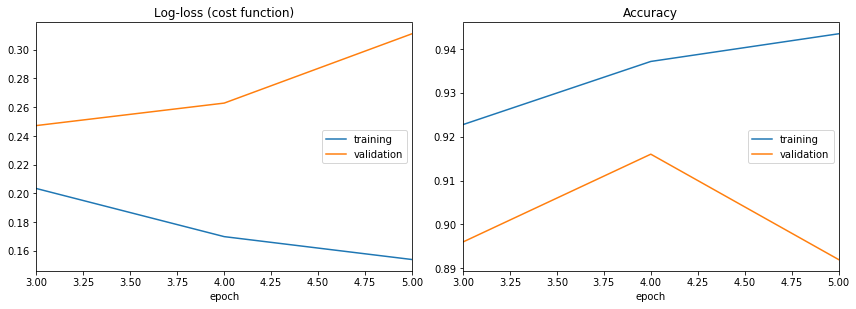

Log-loss (cost function):
training   (min:    0.154, max:    0.371, cur:    0.154)
validation (min:    0.247, max:    0.311, cur:    0.311)

Accuracy:
training   (min:    0.844, max:    0.943, cur:    0.943)
validation (min:    0.892, max:    0.916, cur:    0.892)


In [32]:
# Fit the model
model.fit(X_train, y_train, 
          epochs=5, batch_size=128, 
          verbose=1, validation_split= .01,
          callbacks=[PlotLossesCallback()])

In [38]:
# Final evaluation of the model
scores = model.evaluate(X_test[:10000,], y_test[:10000,], verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.14%
